In [3]:
import numpy as np
import pandas as pd

import os

In [2]:
!pip install autogluon

  Using cached autogluon-1.3.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.core-1.3.1-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.features-1.3.1-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.tabular-1.3.1-py3-none-any.whl.metadata (14 kB)
  Using cached autogluon.multimodal-1.3.1-py3-none-any.whl.metadata (13 kB)
  Using cached autogluon.timeseries-1.3.1-py3-none-any.whl.metadata (12 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached autogluon.common-1.3.1-py3-none-any.whl.metadata (11 kB)
  Using cached hyperopt-0.2.7-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached lightning-2.5.1.post0-py3-none-any.whl.metadata (39 kB)
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached accelerate-1.7.0-py3-none-any.whl.metadata (19 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached seqeval-1.2.2.tar.gz (43 kB)
  Preparing metadata (setup.py) ... done
  Usi

In [4]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#your data path
#faulty
data = pd.read_csv('../failure-prediction-in-manufacture-main/data_subset/20230108/1673143803603-2023_01_08_02_10_03_COD020030/1673143803603-2023_01_08_02_10_03_COD020030_R6ZNZU_DIDKTraceT020030xmlchannelparameterru19820030.csv', delimiter=';')
#correctly working
data2 = pd.read_csv('../failure-prediction-in-manufacture-main/data_subset/20231115/1700051761449-2023_11_15_12_36_01_COD020030/1700051761449-2023_11_15_12_36_01_COD020030_R6ZNZU_DIDKTraceT020030xmlchannelparameterru19820030.csv', delimiter=';')

FileNotFoundError: [Errno 2] No such file or directory: '../failure-prediction-in-manufacture-main/data_subset/20230108/1673143803603-2023_01_08_02_10_03_COD020030/1673143803603-2023_01_08_02_10_03_COD020030_R6ZNZU_DIDKTraceT020030xmlchannelparameterru19820030.csv'

In [5]:
df = data.copy()
df2 = data2.copy()
data

,time,f1,f2,f3,f4
0,0.000,1799.86048,1800.0,0.20703,1800.0
1,0.002,1799.86049,1800.0,0.23828,1800.0
2,0.004,1799.86052,1800.0,0.22656,1800.0
3,0.006,1799.86048,1800.0,0.20703,1800.0
4,0.008,1799.86049,1800.0,0.23828,1800.0
...,...,...,...,...,...
19292,38.584,1799.86224,1800.0,0.78125,1800.0
19293,38.586,1799.86223,1800.0,0.77344,1800.0
19294,38.588,1799.86223,1800.0,0.78125,1800.0
19295,38.590,1799.86224,1800.0,0.78125,1800.0


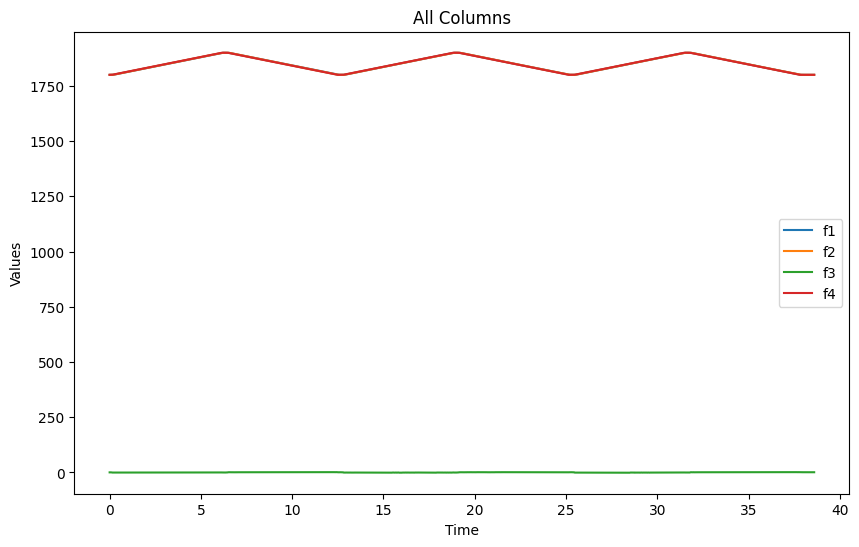

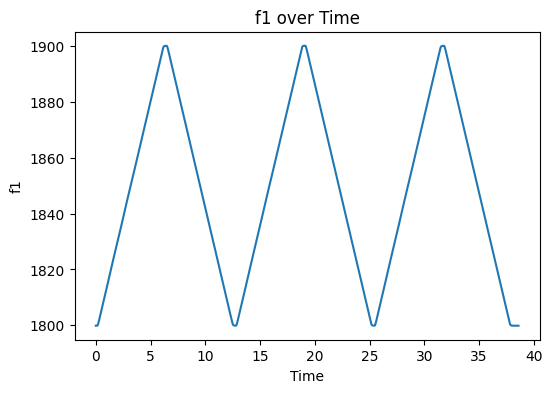

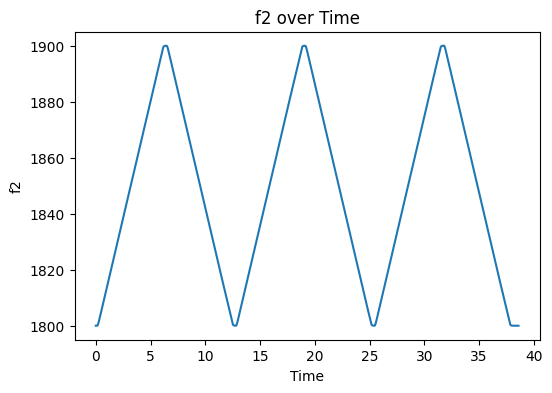

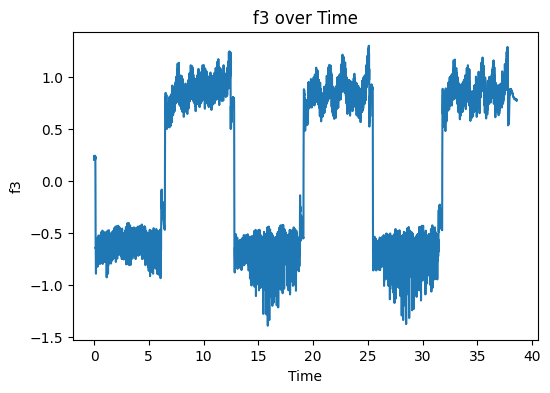

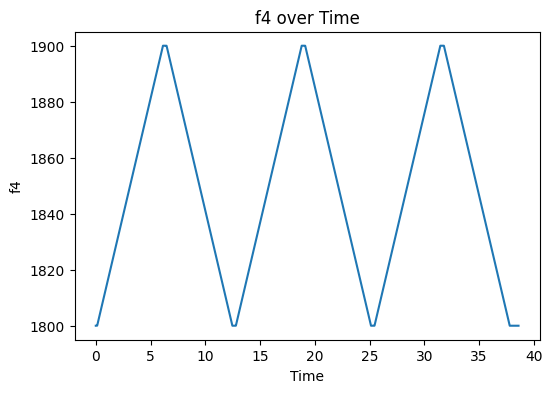

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in df.columns[1:]:
    plt.plot(df['time'], df[col], label=col)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('All Columns')
plt.legend()
plt.show()

for col in df.columns[1:]:
    plt.figure(figsize=(6, 4))
    plt.plot(df['time'], df[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(f'{col} over Time')
    plt.show()

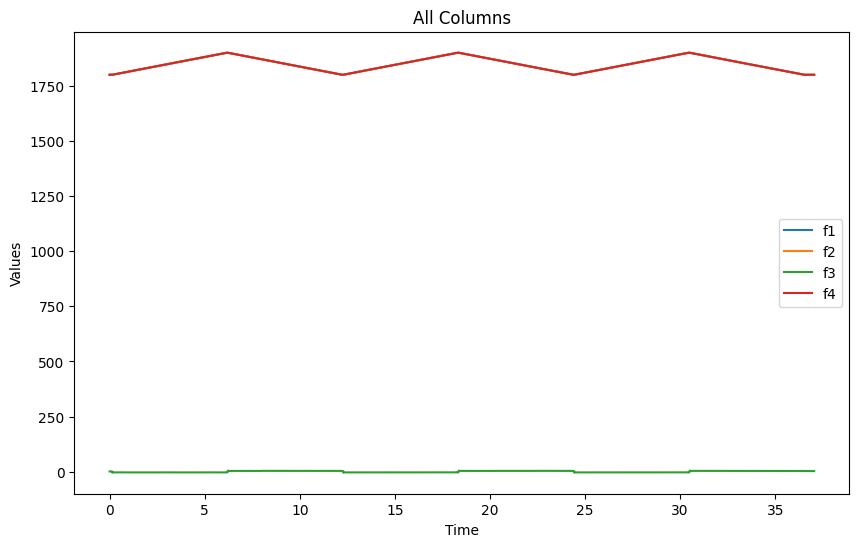

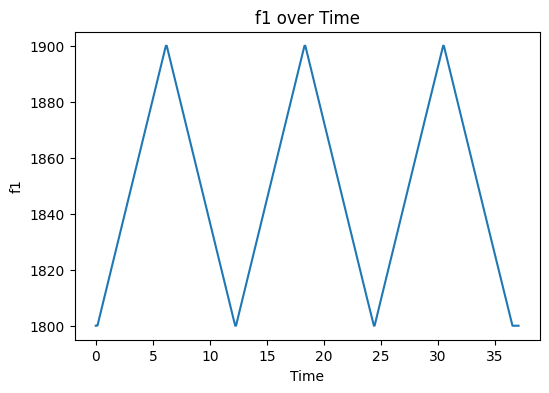

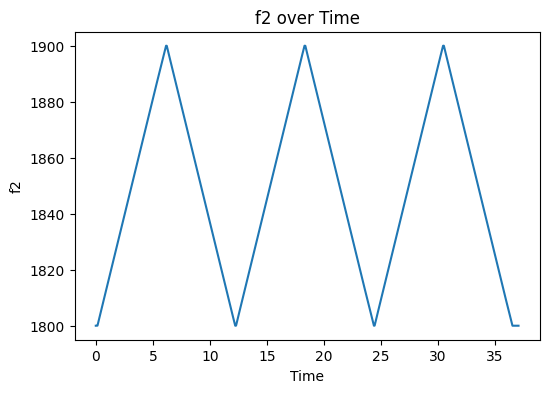

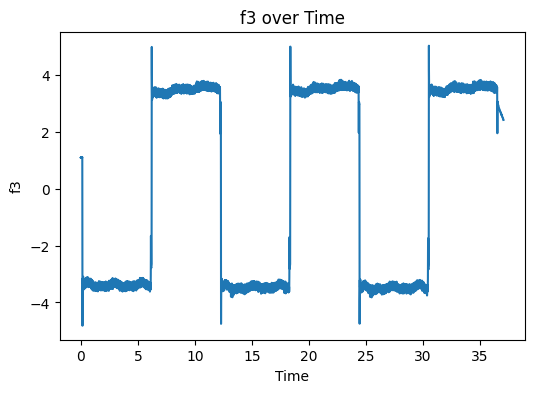

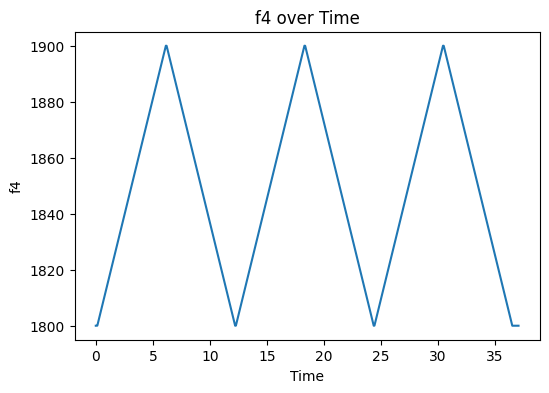

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in df2.columns[1:]:
    plt.plot(df2['time'], df2[col], label=col)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('All Columns')
plt.legend()
plt.show()

for col in df2.columns[1:]:
    plt.figure(figsize=(6, 4))
    plt.plot(df2['time'], df2[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.title(f'{col} over Time')
    plt.show()

In [10]:
import pandas as pd
from pathlib import Path


# your data path
directory_path = '../data_subset/'

directory = Path(directory_path)

dataframes = []

# Get a sorted list of the CSV files
csv_files = sorted(directory.rglob('*.csv'))

for csv_file in csv_files:
    df = pd.read_csv(csv_file, delimiter=';')
    dataframes.append(df)

In [11]:
dataframes[0]

,time,f1,f2,f3,f4
0,0.0,1800.00315,1800.000,-0.13672,1800.0
1,2.0,1800.00315,1800.000,-0.16016,1800.0
2,4.0,1800.00311,1800.000,-0.16016,1800.0
3,6.0,1800.00314,1800.000,-0.13672,1800.0
4,8.0,1800.00315,1800.000,-0.15625,1800.0
...,...,...,...,...,...
18516,37032.0,1800.00106,1799.997,1.17578,1800.0
18517,37034.0,1800.00106,1799.997,1.17188,1800.0
18518,37036.0,1800.00107,1799.997,1.16406,1800.0
18519,37038.0,1800.00107,1799.997,1.16016,1800.0


In [12]:
dataframes[0].isnull().sum()

time    0
f1      0
f2      0
f3      0
f4      0
dtype: int64

In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(dataframes[0], sortby="time")
profile.to_file('profile_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 568.33it/s]


## Descriptive Statistics and Stationarity/Seasonality

In [16]:
summary_stats_faulty = dataframes[0].describe()
print(summary_stats_faulty)

               time            f1            f2            f3           f4
count  18521.000000  18521.000000  18521.000000  18521.000000  18521.00000
mean   18520.000000   1849.179352   1849.176648      0.031827   1849.17661
std    10693.393007     29.658462     29.659106      3.502930     29.65771
min        0.000000   1800.000210   1799.997000     -8.091829   1800.00000
25%     9260.000000   1823.428300   1823.425000     -3.425780   1823.42533
50%    18520.000000   1849.159310   1849.157000      1.632810   1849.15867
75%    27780.000000   1874.876270   1874.875000      3.425780   1874.87467
max    37040.000000   1900.008150   1900.005000      8.488991   1900.00000


In [17]:
summary_stats_correct = dataframes[400].describe()
print(summary_stats_correct)

               time            f1            f2            f3            f4
count  18521.000000  18521.000000  18521.000000  18521.000000  18521.000000
mean      18.520000   1849.198308   1849.178834      0.066759   1849.178739
std       10.693393     29.701531     29.701440      3.246465     29.698607
min        0.000000   1800.013864   1799.998040     -4.271311   1800.000000
25%        9.260000   1823.414259   1823.379676     -3.218213   1823.388466
50%       18.520000   1849.179645   1849.156362      2.243767   1849.155519
75%       27.780000   1874.930707   1874.918995      3.294792   1874.922304
max       37.040000   1900.032291   1900.003680      4.294263   1900.000000


### Augmented Dickey-Fuller (ADF) test

In [18]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataframes[0]['f1'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.79395412530947
p-value: 0.002969781458165643
Critical Values: {'1%': -3.430704003183322, '5%': -2.861696456253958, '10%': -2.5668532775124926}


In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataframes[0]['f2'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.919754835770414
p-value: 0.0018941779803708435
Critical Values: {'1%': -3.430704003183322, '5%': -2.861696456253958, '10%': -2.5668532775124926}


In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataframes[0]['f3'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.472666014249772
p-value: 0.00871747314279182
Critical Values: {'1%': -3.4307039840204956, '5%': -2.861696447785205, '10%': -2.5668532730047127}


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dataframes[0]['f4'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -3.7398527801424843
p-value: 0.0035862578686408344
Critical Values: {'1%': -3.430704003183322, '5%': -2.861696456253958, '10%': -2.5668532775124926}


From the Augmented Dickey-Fuller (ADF) test, we see that f1,f2,f4 ts are stationary whereas f3 isn't

### Seasonality observations

In [22]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = dataframes[0][['time', 'f3']]
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(data['f3'], model='additive', period=6500)

# Plot the original time series and the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['f3'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

/tmp/ipykernel_35210/3988093938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])
/tmp/ipykernel_35210/3988093938.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


### Do another seasonal decomposition for a correctly working timeseries

In [23]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

data = dataframes[480][['time', 'f3']]
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(data['f3'], model='additive', period=6500)

# Plot the original time series and the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data['f3'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

/tmp/ipykernel_35210/497207915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time'] = pd.to_datetime(data['time'])
/tmp/ipykernel_35210/497207915.py:36: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
import pandas as pd

def std_mean_positive_negative(df):
    positive_mean = df[df['f3'] > 0]['f3'].mean()
    negative_mean = df[df['f3'] < 0]['f3'].mean()
    positive_std = df[df['f3'] > 0]['f3'].std()
    negative_std = df[df['f3'] < 0]['f3'].std()
    total_std = df['f3'].std()
    return positive_mean, negative_mean, positive_std, negative_std, total_std


std_results = [std_mean_positive_negative(df) for df in dataframes]

std_df = pd.DataFrame(std_results, columns=['Positive_mean', 'Negative_mean', 'Positive_Std', 'Negative_Std', 'Total_Std'])

print(std_df)

      Positive_mean  Negative_mean  Positive_Std  Negative_Std  Total_Std
0          3.454713      -3.457868      0.613425      0.522342   3.502930
1          3.502429      -3.503539      0.601905      0.565957   3.551329
2          3.627285      -3.722982      0.667828      0.776242   3.745497
3          3.779320      -3.843553      0.856614      0.892065   3.910369
4          3.602704      -3.661457      0.428312      0.357858   3.653430
...             ...            ...           ...           ...        ...
1065       3.480437      -3.492763      0.323937      0.186533   3.496331
1066       3.474426      -3.487217      0.301755      0.185332   3.489517
1067       3.452105      -3.476583      0.336695      0.182488   3.474652
1068       3.482353      -3.499517      0.343399      0.179788   3.501319
1069       3.494228      -3.499806      0.350274      0.187164   3.508025

[1070 rows x 5 columns]


In [25]:
#0-342 are the faulty
print("Correctly working:")
print(std_df.iloc[343:].mean())
print("\nFaulty:")
print(std_df[:343].mean())

Correctly working:
Positive_mean    2.375935
Negative_mean   -2.302122
Positive_Std     0.246358
Negative_Std     0.177422
Total_Std        2.350610
dtype: float64

Faulty:
Positive_mean    5.720799
Negative_mean   -5.760084
Positive_Std     0.758181
Negative_Std     0.637869
Total_Std        5.790361
dtype: float64


In [26]:
for df in dataframes:
    df['f2_minus_f1'] = df['f2'] - df['f1']

In [27]:
def std_mean_positive_negative_f2_minus_f1(df):
    positive_mean = df[df['f2_minus_f1'] > 0]['f2_minus_f1'].mean()
    negative_mean = df[df['f2_minus_f1'] < 0]['f2_minus_f1'].mean()
    positive_std = df[df['f2_minus_f1'] > 0]['f2_minus_f1'].std()
    negative_std = df[df['f2_minus_f1'] < 0]['f2_minus_f1'].std()
    total_std = df['f2_minus_f1'].std()
    return positive_mean, negative_mean, positive_std, negative_std, total_std


std_results_f2_mins_f1 = [std_mean_positive_negative_f2_minus_f1(df) for df in dataframes]

std_df_f2_minus_f1 = pd.DataFrame(std_results_f2_mins_f1, columns=['Positive_mean_f2_minus_f1', 'Negative_mean_f2_minus_f1', 'Positive_Std_f2_minus_f1', 'Negative_Std_f2_minus_f1', 'total_Std_f2_minus_f1'])

print(std_df_f2_minus_f1)

      Positive_mean_f2_minus_f1  Negative_mean_f2_minus_f1  \
0                      0.000771                  -0.003259   
1                      0.001468                  -0.002193   
2                      0.001208                  -0.002656   
3                      0.000843                  -0.003154   
4                      0.000553                  -0.003622   
...                         ...                        ...   
1065                   0.001943                  -0.001538   
1066                   0.001742                  -0.001695   
1067                   0.001624                  -0.001781   
1068                   0.001451                  -0.002036   
1069                   0.001315                  -0.002320   

      Positive_Std_f2_minus_f1  Negative_Std_f2_minus_f1  \
0                     0.000495                  0.001757   
1                     0.000907                  0.001439   
2                     0.000711                  0.001580   
3              

In [28]:
print("Correctly working:")
print(std_df_f2_minus_f1.iloc[343:].mean())
print("\nFaulty:")
print(std_df_f2_minus_f1[:343].mean())

Correctly working:
Positive_mean_f2_minus_f1    0.038256
Negative_mean_f2_minus_f1   -0.068595
Positive_Std_f2_minus_f1     0.011662
Negative_Std_f2_minus_f1     0.035697
total_Std_f2_minus_f1        0.053771
dtype: float64

Faulty:
Positive_mean_f2_minus_f1    0.001267
Negative_mean_f2_minus_f1   -0.013099
Positive_Std_f2_minus_f1     0.000853
Negative_Std_f2_minus_f1     0.002286
total_Std_f2_minus_f1        0.002341
dtype: float64


In [29]:
for df in dataframes:
    df['f4_minus_f1'] = df['f4'] - df['f1']

In [30]:
def std_mean_positive_negative_f4_minus_f1(df):
    positive_mean = df[df['f4_minus_f1'] > 0]['f4_minus_f1'].mean()
    negative_mean = df[df['f4_minus_f1'] < 0]['f4_minus_f1'].mean()
    positive_std = df[df['f4_minus_f1'] > 0]['f4_minus_f1'].std()
    negative_std = df[df['f4_minus_f1'] < 0]['f4_minus_f1'].std()
    total_std = df['f4_minus_f1'].std()
    return positive_mean, negative_mean, positive_std, negative_std, total_std


std_results_f4_mins_f1 = [std_mean_positive_negative_f4_minus_f1(df) for df in dataframes]

std_df_f4_minus_f1 = pd.DataFrame(std_results_f4_mins_f1, columns=['Positive_mean_f4_minus_f1', 'Negative_mean_f4_minus_f1', 'Positive_Std_f4_minus_f1', 'Negative_Std_f4_minus_f1', 'total_Std_f4_minus_f1'])

print(std_df_f4_minus_f1)

      Positive_mean_f4_minus_f1  Negative_mean_f4_minus_f1  \
0                      0.179842                  -0.176758   
1                      0.175576                  -0.180902   
2                      0.174977                  -0.181646   
3                      0.174502                  -0.182058   
4                      0.175032                  -0.181478   
...                         ...                        ...   
1065                   0.176325                  -0.180394   
1066                   0.175913                  -0.180713   
1067                   0.175806                  -0.180902   
1068                   0.175292                  -0.181324   
1069                   0.176083                  -0.180532   

      Positive_Std_f4_minus_f1  Negative_Std_f4_minus_f1  \
0                     0.011192                  0.040285   
1                     0.033496                  0.025254   
2                     0.033223                  0.025069   
3              

In [31]:
print("Correctly working:")
print(std_df_f4_minus_f1.iloc[343:].mean())
print("\nFaulty:")
print(std_df_f4_minus_f1[:343].mean())

Correctly working:
Positive_mean_f4_minus_f1    0.345997
Negative_mean_f4_minus_f1   -0.391688
Positive_Std_f4_minus_f1     0.071280
Negative_Std_f4_minus_f1     0.087057
total_Std_f4_minus_f1        0.377991
dtype: float64

Faulty:
Positive_mean_f4_minus_f1    0.169342
Negative_mean_f4_minus_f1   -0.187335
Positive_Std_f4_minus_f1     0.011597
Negative_Std_f4_minus_f1     0.039498
total_Std_f4_minus_f1        0.180776
dtype: float64


### Using the mean and standard variation as inputs for a classification mlp. The mlp requires only 1 hidden layer with 2 perceptrons in order to perfectly classify the data

In [32]:
# faulty data
std_df['label'] = 0
for i in range(343):
    std_df.iat[i, 5] = 0

# correct data
for i in range(343, 482):
    std_df.iat[i, 5] = 1

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features = ['Positive_mean', 'Negative_mean', 'Positive_Std', 'Negative_Std', 'Total_Std']

X = std_df[features]
y = std_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8644859813084113
Confusion Matrix:
[[185   0]
 [ 29   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       185
           1       0.00      0.00      0.00        29

    accuracy                           0.86       214
   macro avg       0.43      0.50      0.46       214
weighted avg       0.75      0.86      0.80       214



/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2025-06-03 11:27:51.074221: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-03 11:27:51.101179: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-03 11:27:51.733656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [35]:
#Timeseries with least samples
min_length = min(len(df) for df in dataframes)
print(min_length)

18493


In [36]:
X = [df[['time', 'f1', 'f2', 'f3', 'f4']] for df in dataframes]

In [37]:
X[0].transpose()

,0,1,2,3,4,5,6,7,8,9,...,18511,18512,18513,18514,18515,18516,18517,18518,18519,18520
time,0.00000,2.00000,4.00000,6.00000,8.00000,10.00000,12.00000,14.00000,16.00000,18.00000,...,37022.00000,37024.00000,37026.00000,37028.00000,37030.00000,37032.00000,37034.00000,37036.00000,37038.00000,37040.00000
f1,1800.00315,1800.00315,1800.00311,1800.00314,1800.00315,1800.00311,1800.00312,1800.00316,1800.00312,1800.00312,...,1800.00103,1800.00103,1800.00104,1800.00105,1800.00105,1800.00106,1800.00106,1800.00107,1800.00107,1800.00108
f2,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,...,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700,1799.99700
f3,-0.13672,-0.16016,-0.16016,-0.13672,-0.15625,-0.16406,-0.14063,-0.14844,-0.16797,-0.14453,...,1.20703,1.19922,1.19531,1.18750,1.18359,1.17578,1.17188,1.16406,1.16016,1.15234
f4,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,...,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000,1800.00000


### Do the classification using only the f3 attribute

In [38]:
# Keep only f3 and transpose it. Create a dataframe from the transposed timeseries
X = [df[['f3']] for df in dataframes]

reshaped_dataframe = pd.DataFrame()

# Iterate through dataframes
for df in X:
    reshaped_dataframe = pd.concat([reshaped_dataframe, df.transpose()], ignore_index=True)

In [39]:
#Fill missing values with 0. Missing values exist because not every data packet is the same length.
#Another approach could be to keep the length of the shortest timeseries in order to not have any missing values
reshaped_dataframe = reshaped_dataframe.fillna(0)

#Label the dataframe with 0 for anomalous and 1 for normal
reshaped_dataframe['label'] = 0

# faulty data
for i in range(343):
    reshaped_dataframe.iat[i, 19309] = 0

# correct data
for i in range(343, 482):
    reshaped_dataframe.iat[i, 19309] = 1

In [40]:
reshaped_dataframe

,0,1,2,3,4,5,6,7,8,9,...,19300,19301,19302,19303,19304,19305,19306,19307,19308,label
0,-0.13672,-0.16016,-0.16016,-0.13672,-0.15625,-0.16406,-0.14063,-0.14844,-0.16797,-0.14453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.52734,-0.52734,-0.53125,-0.52734,-0.52734,-0.53125,-0.52734,-0.52734,-0.53125,-0.53125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-1.10156,-1.10156,-1.10156,-1.10547,-1.10156,-1.10547,-1.10547,-1.10156,-1.10156,-1.10547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-1.08984,-1.07813,-1.07813,-1.08984,-1.08594,-1.07813,-1.08594,-1.08594,-1.07813,-1.08203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-1.14063,-1.14453,-1.14844,-1.14063,-1.14453,-1.14453,-1.14063,-1.14453,-1.14453,-1.14453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.51172,0.51172,0.48438,0.50391,0.51953,0.49219,0.49609,0.52344,0.50000,0.48828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1066,0.78125,0.74609,0.71875,0.77344,0.76563,0.71875,0.75391,0.77734,0.72656,0.73828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1067,0.35547,0.35156,0.34766,0.35547,0.35547,0.34766,0.35547,0.35547,0.34766,0.35156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1068,0.33984,0.32813,0.31250,0.33594,0.33203,0.31250,0.33203,0.33984,0.31250,0.32422,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [41]:
#Do the classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and labels (y)
X = reshaped_dataframe.drop(columns=['label'])
y = reshaped_dataframe['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6869158878504673
Confusion Matrix:
[[131  54]
 [ 13  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       185
           1       0.23      0.55      0.32        29

    accuracy                           0.69       214
   macro avg       0.57      0.63      0.56       214
weighted avg       0.82      0.69      0.73       214



### Do the classification with all 4 attributes

In [42]:
#Keep all attributes except the time
X = [df[['f1', 'f2', 'f3', 'f4']] for df in dataframes]
reshaped_dataframe_all_attributes = pd.DataFrame()

for i in range(len(X)):
    df_transposed = X[i]
    combined_row_df = pd.DataFrame(df_transposed.values.flatten(), columns=['combined_values'])
    combined_row_df.reset_index(drop=True, inplace=True)
    reshaped_dataframe_all_attributes = pd.concat([reshaped_dataframe_all_attributes, combined_row_df.transpose()], ignore_index=True)

In [43]:
reshaped_dataframe_all_attributes = reshaped_dataframe_all_attributes.fillna(0)

#Label the dataframe with 0 for anomalous and 1 for normal
reshaped_dataframe_all_attributes['label'] = 0

# faulty data
for i in range(343):
    reshaped_dataframe_all_attributes.iat[i, 77236] = 0

# correct data
for i in range(343, 482):
    reshaped_dataframe_all_attributes.iat[i, 77236] = 1

In [44]:
reshaped_dataframe_all_attributes

,0,1,2,3,4,5,6,7,8,9,...,77227,77228,77229,77230,77231,77232,77233,77234,77235,label
0,1800.00315,1800.0,-0.13672,1800.0,1800.00315,1800.0,-0.16016,1800.0,1800.00311,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1800.00142,1800.0,-0.52734,1800.0,1800.00142,1800.0,-0.52734,1800.0,1800.00142,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1800.00271,1800.0,-1.10156,1800.0,1800.00271,1800.0,-1.10156,1800.0,1800.00271,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1800.00361,1800.0,-1.08984,1800.0,1800.00360,1800.0,-1.07813,1800.0,1800.00362,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1800.00441,1800.0,-1.14063,1800.0,1800.00442,1800.0,-1.14453,1800.0,1800.00441,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1799.99812,1800.0,0.51172,1800.0,1799.99817,1800.0,0.51172,1800.0,1799.99815,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1066,1799.99866,1800.0,0.78125,1800.0,1799.99872,1800.0,0.74609,1800.0,1799.99863,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1067,1799.99907,1800.0,0.35547,1800.0,1799.99908,1800.0,0.35156,1800.0,1799.99907,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1068,1799.99984,1800.0,0.33984,1800.0,1799.99987,1800.0,0.32813,1800.0,1799.99983,1800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [46]:
#Do the classification

# Separate features (X) and labels (y)
X = reshaped_dataframe_all_attributes.drop(columns=['label'])
y = reshaped_dataframe_all_attributes['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 30), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8644859813084113
Confusion Matrix:
[[185   0]
 [ 29   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       185
           1       0.00      0.00      0.00        29

    accuracy                           0.86       214
   macro avg       0.43      0.50      0.46       214
weighted avg       0.75      0.86      0.80       214



/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/zak/Documents/Workspace/MLOps/Thesis/mlops_comparison/IDEKO Case/MLFlow/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 

Can't easily get perfect accuracy with a simple MLP when we have all the input. We get some false positives (false failure detections)

In [47]:
import xgboost as xgb

params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',         # Evaluation metric
    'eta': 0.03,                       # Learning rate
    'n_estimators': 650, 
    'max_depth': 8,                   # Maximum depth of tree
    'min_child_weight': 1,            # Minimum sum of instance weight needed in a child
    'gamma': 0.1,                     # Minimum loss reduction required to make a further partition on a leaf node
    'seed': 42                        # Random seed
}

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
classification_rep = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9532710280373832
Confusion Matrix:
[[182   3]
 [  7  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       185
           1       0.88      0.76      0.81        29

    accuracy                           0.95       214
   macro avg       0.92      0.87      0.89       214
weighted avg       0.95      0.95      0.95       214



A slightly tuned xgboost can learn to perfectly categorise the timeseries even with all the attributes

### Autogluon Analysis

In [48]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_df, test_df = train_test_split(std_df, test_size=0.2, random_state=42)
predictor = TabularPredictor(label='label').fit(train_data=train_df)
predictions = predictor.predict(test_df.drop(columns=['label']))

accuracy = accuracy_score(test_df['label'], predictions)
conf_matrix = confusion_matrix(test_df['label'], predictions)
classification_rep = classification_report(test_df['label'], predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

No path specified. Models will be saved in: "AutogluonModels/ag-20250603_113433"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.3
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr 17 19:20:47 UTC 2
CPU Count:          16
Memory Avail:       11.05 GB / 31.12 GB (35.5%)
Disk Space Avail:   654.05 GB / 914.78 GB (71.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use 

Accuracy: 0.9158878504672897
Confusion Matrix:
[[183   2]
 [ 16  13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       185
           1       0.87      0.45      0.59        29

    accuracy                           0.92       214
   macro avg       0.89      0.72      0.77       214
weighted avg       0.91      0.92      0.90       214



autogluon can't run with all features. The dataset is too large

In [49]:
train_df, test_df = train_test_split(reshaped_dataframe, test_size=0.2, random_state=42)
predictor = TabularPredictor(label='label').fit(time_limit=60*20, train_data=train_df)
predictions = predictor.predict(test_df.drop(columns=['label']))

accuracy = accuracy_score(test_df['label'], predictions)
conf_matrix = confusion_matrix(test_df['label'], predictions)
classification_rep = classification_report(test_df['label'], predictions)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

No path specified. Models will be saved in: "AutogluonModels/ag-20250603_113443"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.12.3
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~24.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Apr 17 19:20:47 UTC 2
CPU Count:          16
Memory Avail:       11.26 GB / 31.12 GB (36.2%)
Disk Space Avail:   654.04 GB / 914.78 GB (71.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use 

Accuracy: 0.9252336448598131
Confusion Matrix:
[[181   4]
 [ 12  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       185
           1       0.81      0.59      0.68        29

    accuracy                           0.93       214
   macro avg       0.87      0.78      0.82       214
weighted avg       0.92      0.93      0.92       214



Autogluon gives good results for the f3 dataset